# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN and Clustering Examples

**COMPLETE THE TASKS IN BOLD BELOW:**

**TASK: Run the following cells to import the data and view the DataFrame.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [11]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

**TASK: Created a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

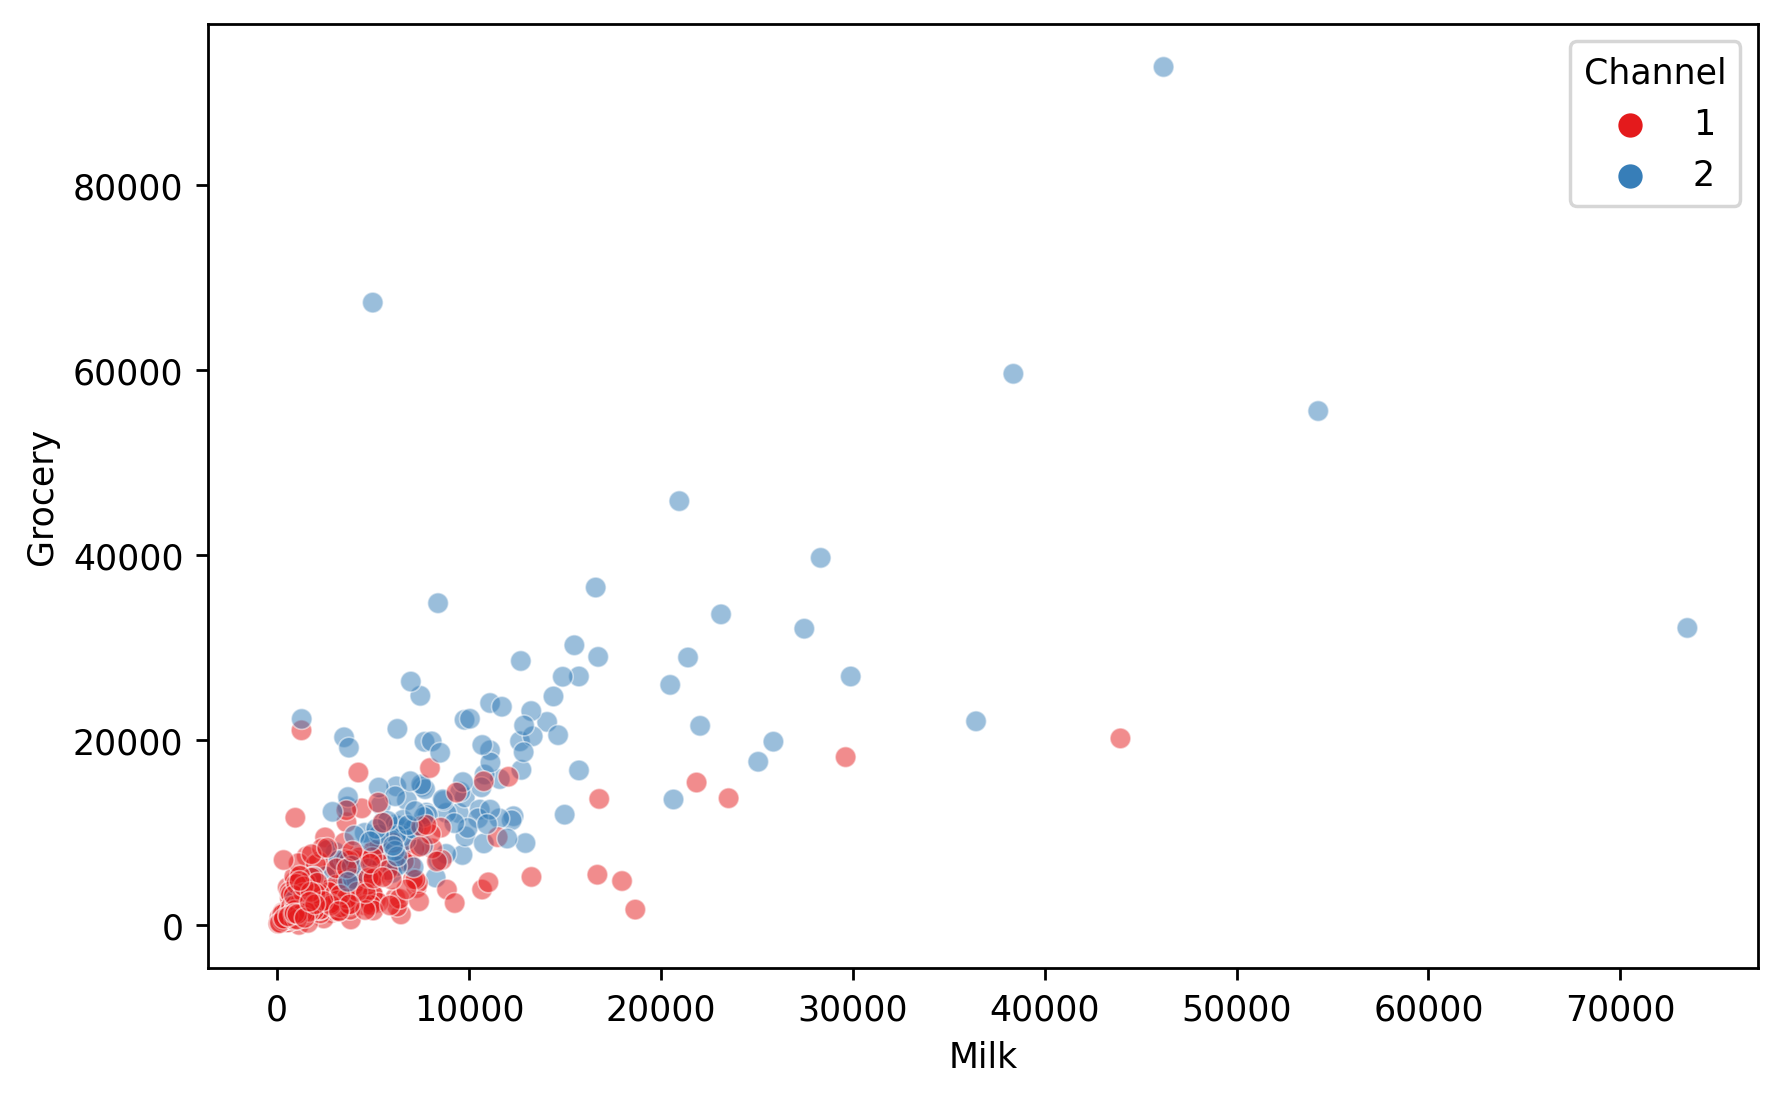

In [10]:

plt.figure(figsize=(8,5),dpi=250)
sns.scatterplot(data=df,x='Milk',y='Grocery',hue='Channel',alpha=0.5,palette='Set1')

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

<AxesSubplot:xlabel='Milk', ylabel='Count'>

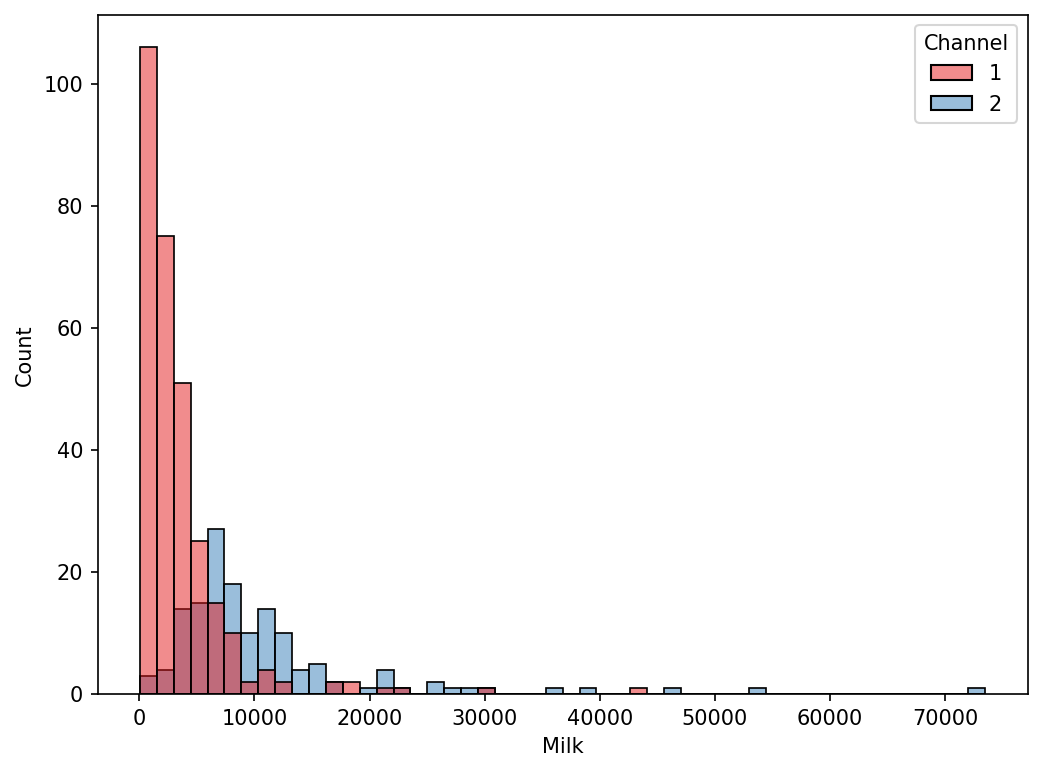

In [16]:
plt.figure(figsize=(8,6),dpi=150)
sns.histplot(data=df,x='Milk',hue='Channel',palette='Set1')

In [ ]:
# maximum milk are bought through channel 1 and max number of expendure is under the 10k thresh hold

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

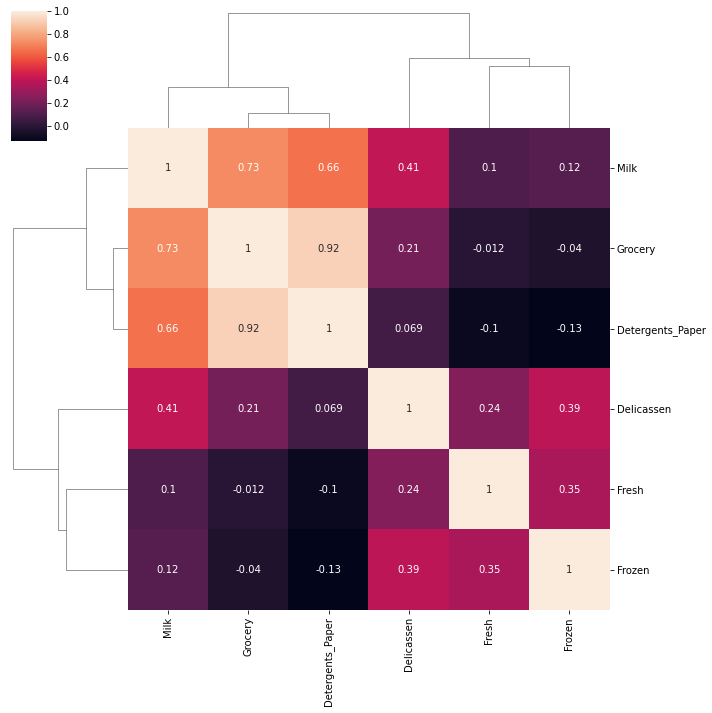

In [23]:
sns.clustermap(df.drop(['Channel','Region'],axis=1).corr(),annot= True)

Correlation Between Spending Categories


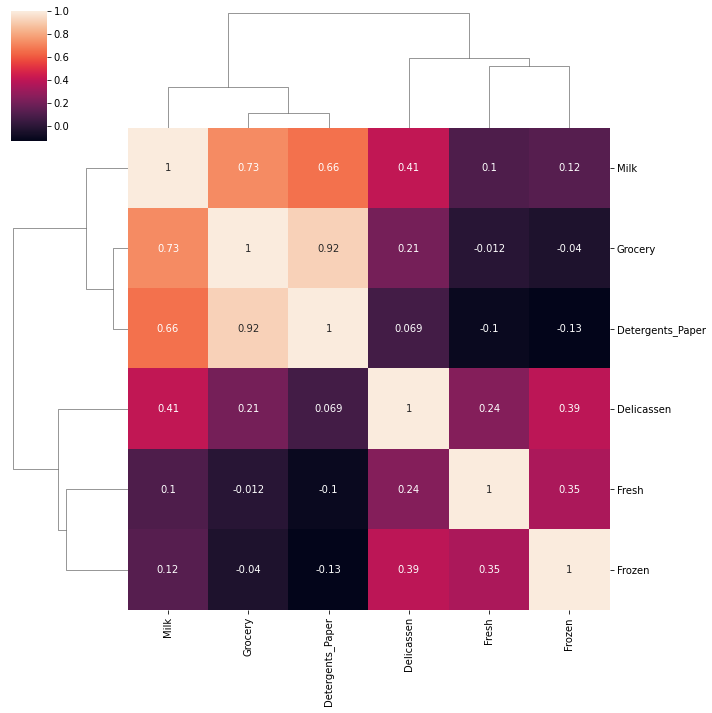

In [86]:
# Here we can see that from the amount of expendeture, people spend fairly same thresh hold amount of money on Milk, Grocery and Detergent paper, Kinda of mostly needed items on a regular house hold.
# Delicatessen, Fresh and Frozen tends to be much more less correlated from that perspective.

**TASK: Create a PairPlot of the dataframe, colored by Region.**

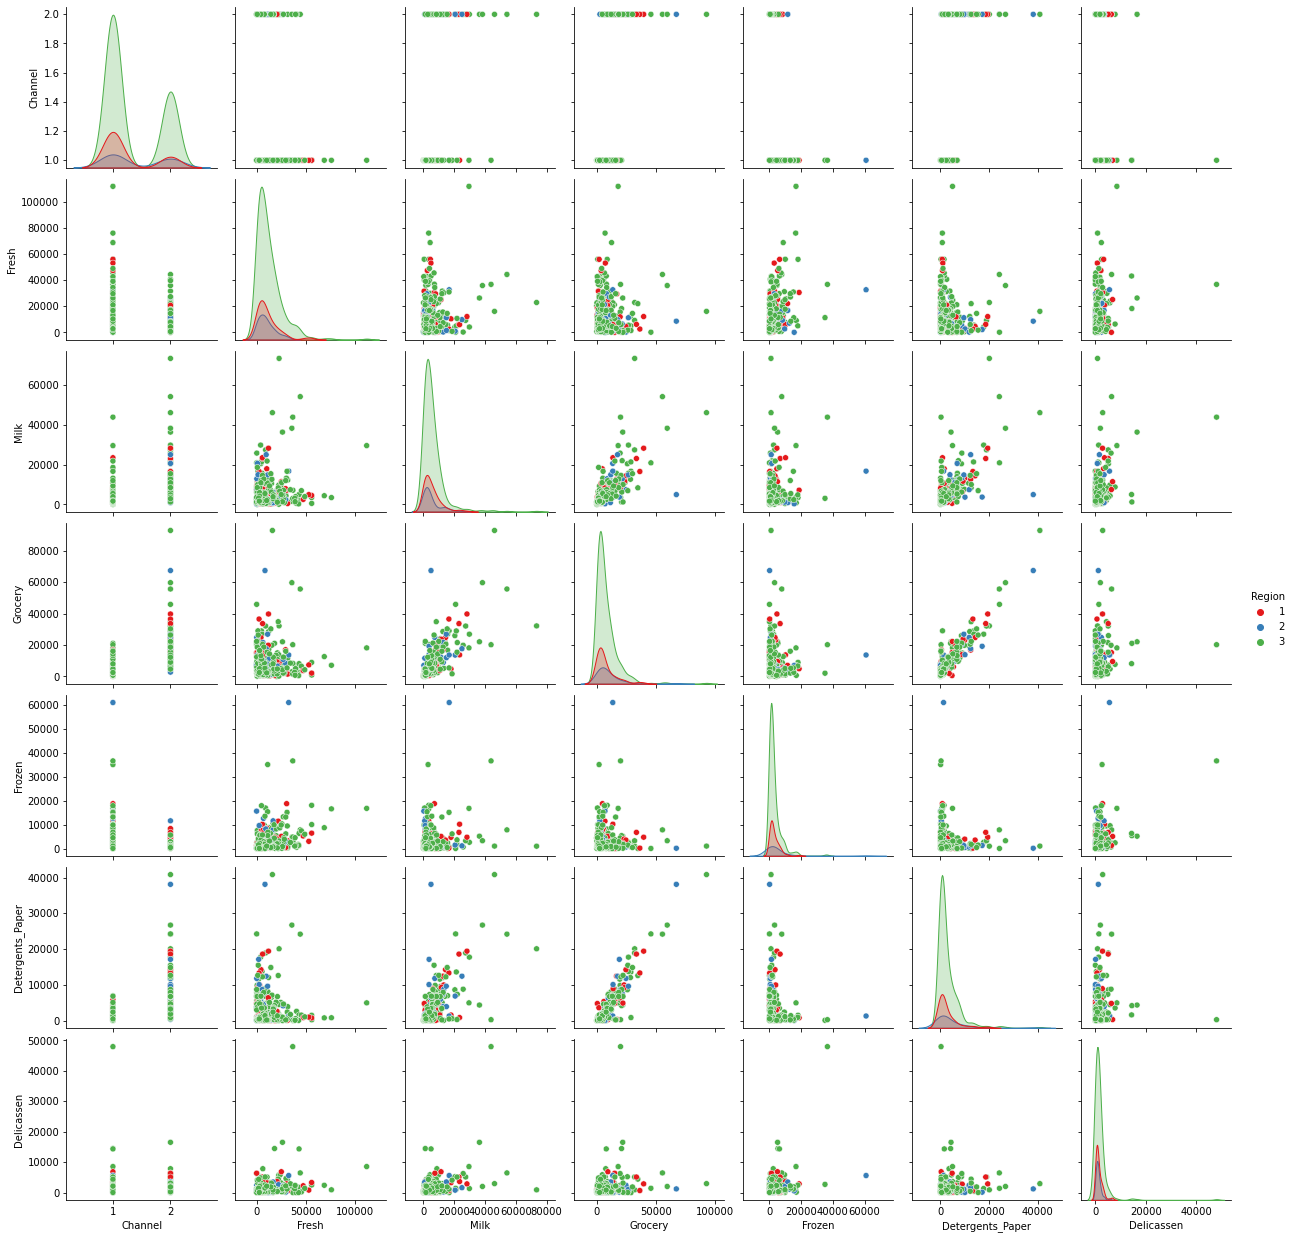

In [28]:
#CODE HERE
sns.pairplot(df,hue='Region',palette='Set1')

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [36]:
from sklearn.preprocessing import StandardScaler
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [33]:
scaler = StandardScaler()

In [35]:
scaled_x= scaler.fit_transform(df)
scaled_x

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [38]:
feature_dim = scaled_x.shape[1]

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
outlier_percent=[]
number_of_outliers = []

for eps in np.linspace(0.01,3,100):
    model = DBSCAN(eps=eps,min_samples=2*feature_dim)
    model.fit(scaled_x)
    number_of_outliers.append(np.sum(model.labels_ == -1))
    percentage = 100*np.sum(model.labels_ == -1)/len(model.labels_)
    outlier_percent.append(percentage)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0, 0.5, 'Percentage of points classified as outliers')

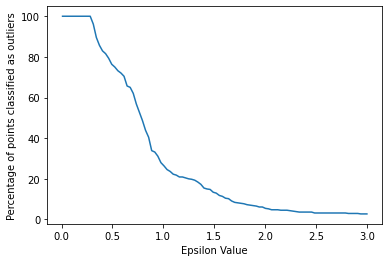

In [45]:
sns.lineplot(x=np.linspace(0.01,3,100),y=outlier_percent)
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of points classified as outliers')
# plt.xlim(1,2.5)
# plt.ylim(0,20)

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [54]:
final_model = DBSCAN(eps=2.0, min_samples=2*feature_dim)
final_model.fit(scaled_x)
labels = final_model.labels_
df['Labels'] = labels
df['Labels'].unique()

array([ 0,  1, -1], dtype=int64)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

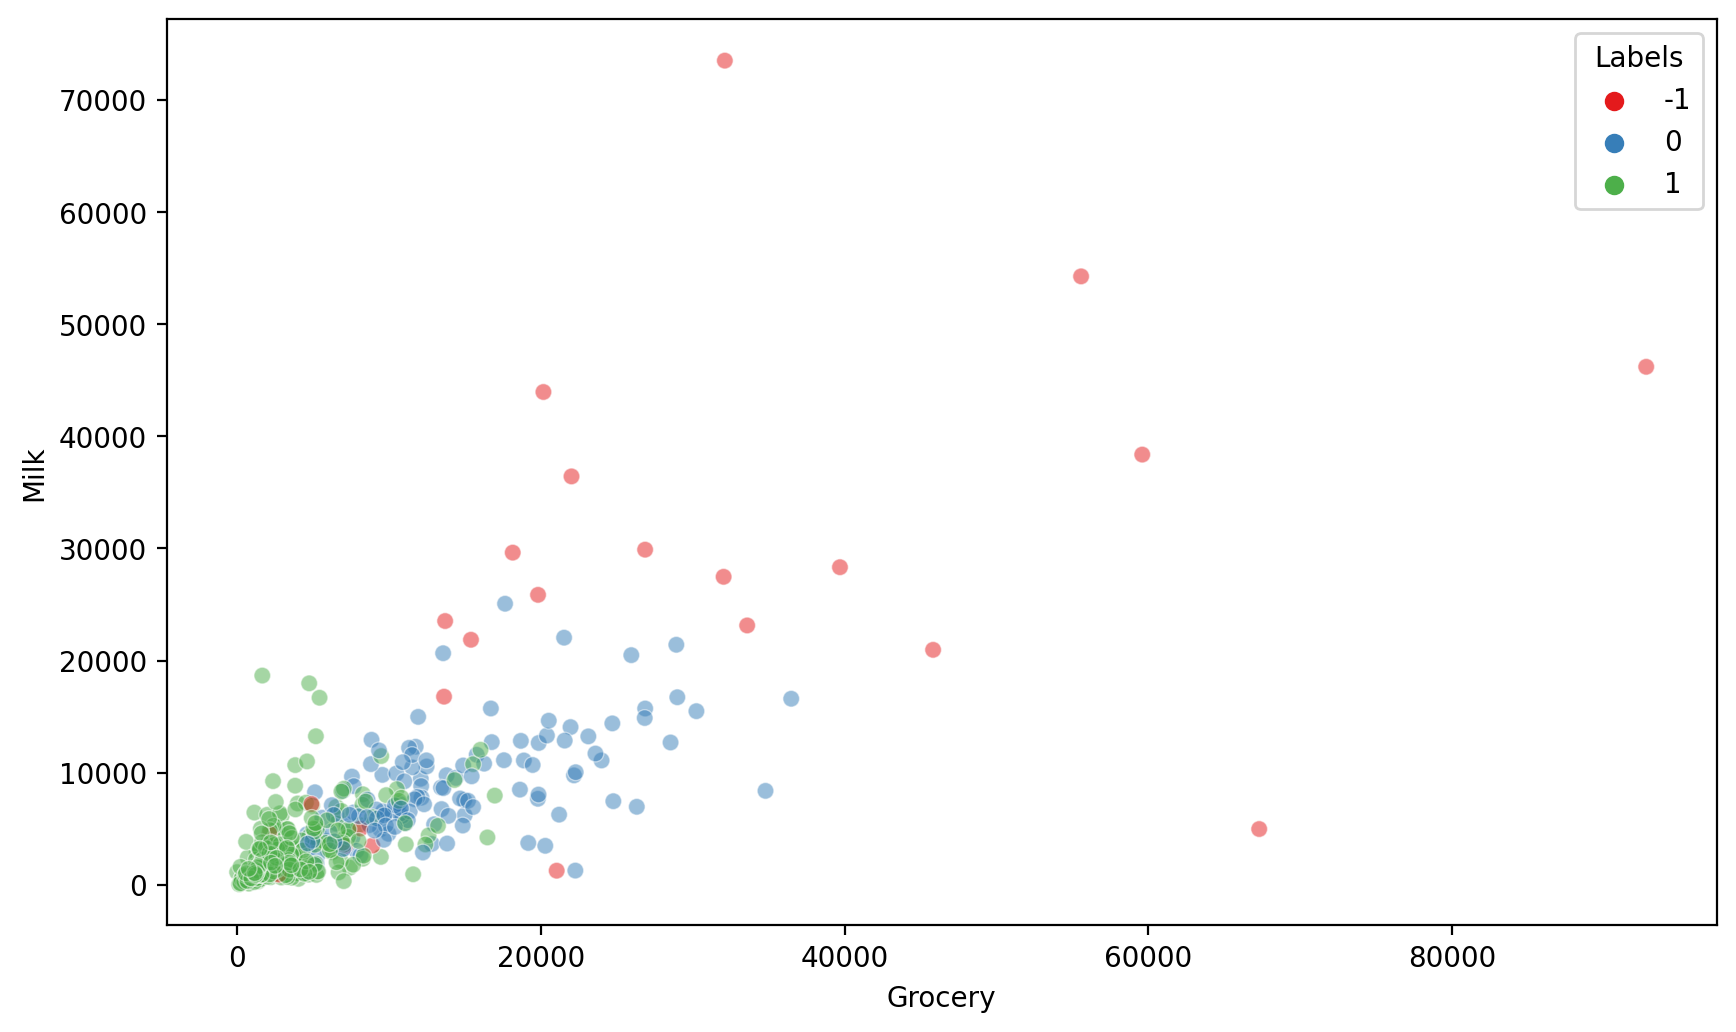

In [57]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Grocery',y='Milk',alpha=0.5,hue='Labels',palette='Set1')

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

<AxesSubplot:xlabel='Milk', ylabel='Detergents_Paper'>

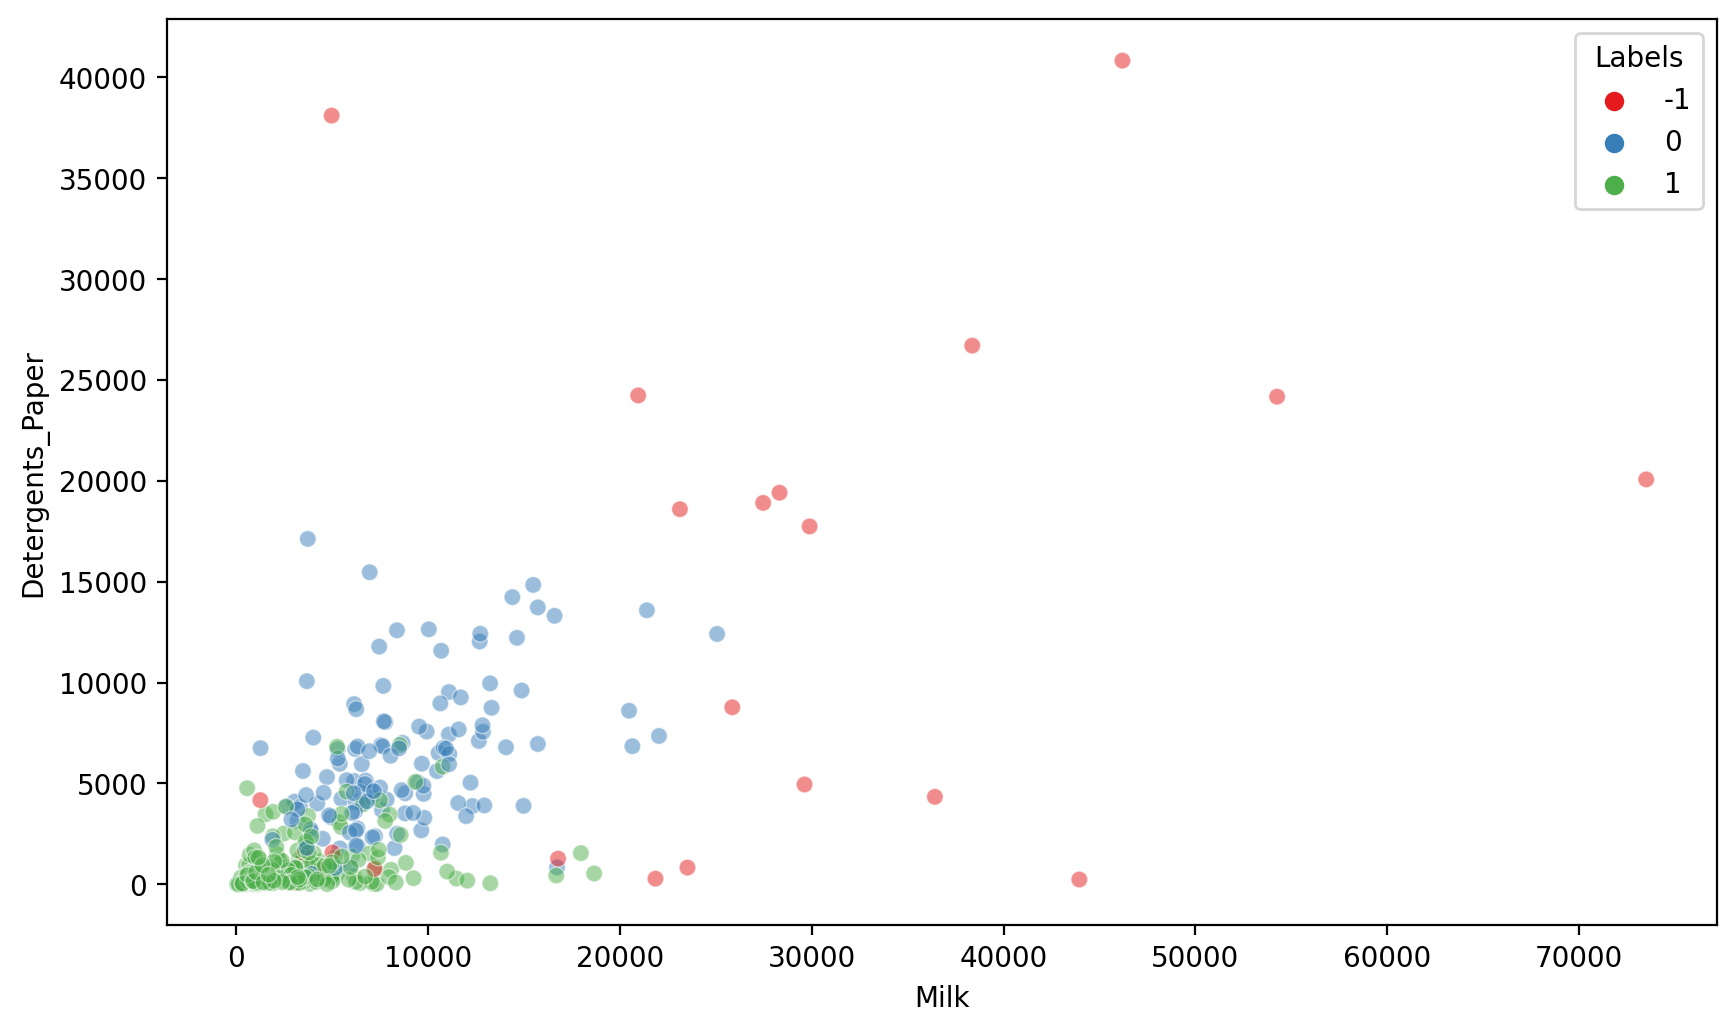

In [58]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Milk',y='Detergents_Paper',alpha=0.5,hue='Labels',palette='Set1')

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [59]:
cats=df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('Labels').mean()

In [60]:
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


<AxesSubplot:ylabel='Labels'>

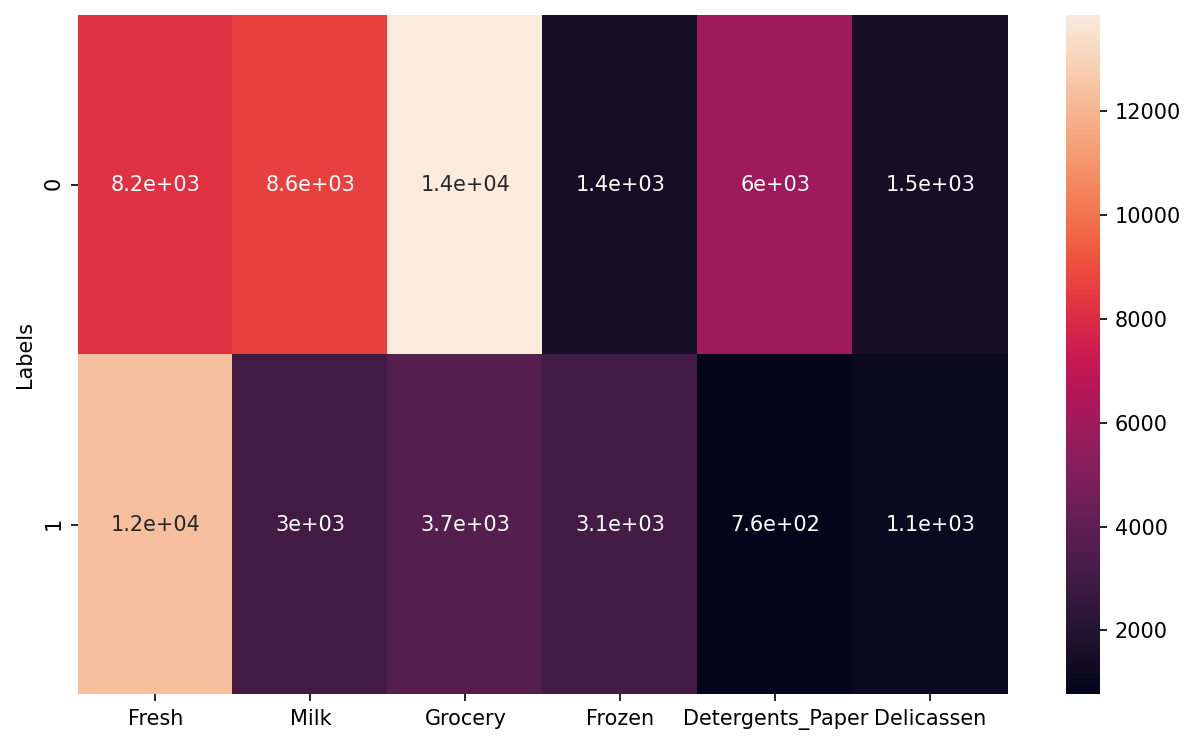

In [65]:
plt.figure(figsize=(10,6),dpi=150)
sns.heatmap(cat_means.loc[[0,1]],annot=True)

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
min_max = MinMaxScaler()

In [69]:
scaled_cat_data = min_max.fit_transform(cat_means)

In [71]:
pd.DataFrame(scaled_cat_data,cat_means.index,cat_means.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<AxesSubplot:ylabel='Labels'>

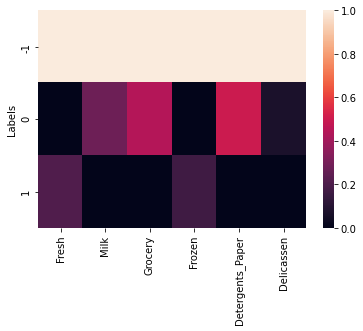

In [72]:
sns.heatmap(data=pd.DataFrame(scaled_cat_data,cat_means.index,cat_means.columns))

In [74]:
#Thank you!